In [192]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
df = pd.read_csv('new_homes_OH_MI_NY_Current_10yr.csv')

In [4]:
df.head(10)

,id,pid,pid2,fname,mname,lname,suffix,fname2,mname2,lname2,...,hhid,hhid2,internal2,internal3,internal4,internal5,rcd_key,yyyy,mm,infutorstate
0,37419674,Y39394865072945,Y39394865935440,RORY,L,HUMPHREY,NaN,BARBARA,J,HUMPHREY,...,128123539HUMPHREY,128123539HUMPHREY,20200428,NaN,NaN,NaN,Y39394865072945*128123539*001*27-00226.000,2021,1,OH
1,24718273,Y39394624882489,Y39394624881598,MICHAEL,P,VARLEY,SR,CATHERINE,N,VARLEY,...,234133101VARLEY,234133101VARLEY,20200323,NaN,NaN,NaN,Y39394624882489*234133101*001*01-119050,2021,1,OH
2,36595605,Y39394802600245,Y39394802656763,LLOYD,R,LEWIS,III,MARGARET,J,LEWIS,...,297089711LEWIS,297089711LEWIS,20200428,NaN,NaN,NaN,Y39394802600245*297089711*001*05-00-035-105-052,2021,1,OH
3,32802445,Y39398428157394,NaN,SANG,THANH,NGUYEN,NaN,NaN,NaN,NaN,...,3938023NGUYEN,NaN,20200428,NaN,NaN,NaN,Y39398428157394*3938023*001*001-02A-23-221,2021,1,OH
4,32802611,Y39394912893620,Y39394924119483,MICHAEL,A,SCHROLL,NaN,KRISTEN,E,SCHROLL,...,115078031SCHROLL,115078031SCHROLL,20200428,NaN,NaN,NaN,Y39394912893620*115078031*001*026-06B-11-049,2021,1,OH
5,32847936,Y39398413301402,N3939BP5VPYTLJGG4GEB,DAVID,NaN,KHOSHTARIYA,NaN,YANA,NaN,KHOSHTARIYA,...,228057110KHOSHTARIYA,228057110KHOSHTARIYA,20200428,NaN,NaN,NaN,Y39398413301402*228057110*001*16-00-010-000-048,2021,1,OH
6,33924553,N3939IOIWT84O07Z527N,NaN,DANNY,E,TAYLOR,NaN,NaN,NaN,NaN,...,828723140TAYLOR,NaN,20200428,NaN,NaN,NaN,N3939IOIWT84O07Z527N*828723140*001*44-00173.000,2021,1,OH
7,35348335,N3939VTDSFV0RBINJRHD,N3939DCOCC2Y9Q4TXBVK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,277318142STE,20200428,NaN,NaN,NaN,N3939VTDSFV0RBINJRHD*251250703*001*10-000600.0000,2021,1,OH
8,49085626,N3939CEBOXFBVCW2ZT63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20200623,NaN,NaN,NaN,N3939CEBOXFBVCW2ZT63*14146339*001*956-25-003,2021,1,OH
9,134645364,N3939HV4X25XS3E5Q9MB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20201221,NaN,NaN,NaN,N3939HV4X25XS3E5Q9MB*630004482*001*318-432-01-...,2021,1,OH


In [5]:
df['infutorstate'].value_counts()

OH    100
Name: infutorstate, dtype: int64

In [106]:
df['prop_rescd'].value_counts()

Y    279
N     21
Name: prop_rescd, dtype: int64

Filter list to residential data

In [154]:
df_rescd = df.loc[df['prop_rescd'] == 'Y'].loc[df['state'] == 'OH']

In [155]:
df_rescd.head(10)

,id,pid,pid2,fname,mname,lname,suffix,fname2,mname2,lname2,...,hhid2,internal2,internal3,internal4,internal5,rcd_key,yyyy,mm,infutorstate,SaleYear
0,48884953,Y39394314226910,NaN,KRISTY,L,KNAUP,NaN,NaN,NaN,NaN,...,NaN,20200623,NaN,NaN,NaN,Y39394314226910*2541323*001*10-375500.0000,2021,1,OH,2008
2,50114126,Y39394252530995,Y39394395760967,STEPHEN,P,SMITH,NaN,LESLEY,A,SMITH,...,336634343SMITH,20200623,NaN,NaN,NaN,Y39394252530995*336634343*001*481-23-079,2021,1,OH,2011
3,52645344,Y39394910732302,Y39394275595405,JESSICA,NaN,GRASSI,NaN,MATTHEW,NaN,SIMONETTA,...,580856321SIMONETTA,20200623,NaN,NaN,NaN,Y39394910732302*580856321*001*66-01669,2021,1,OH,2011
4,53914908,Y39394472796490,Y39394206646174,JOSEPH,A,CALABRESE,NaN,ARETE,A,CALABRESE,...,248422830CALABRESE,20200623,NaN,NaN,NaN,Y39394472796490*248422830*001*33-12756,2021,1,OH,2016
5,131763972,Y39394691168724,Y39394691167870,FAREED,R,SHAIKH,NaN,NOSHEEN,N,SHAIKH,...,283079833SHAIKH,20201221,NaN,NaN,NaN,Y39394691168724*283079833*001*319-134-06-013-000,2021,1,OH,2010
6,81073749,Y39398471328266,NaN,LEE,H,CAROL,NaN,NaN,NaN,NaN,...,NaN,20200922,NaN,NaN,NaN,Y39398471328266*311261203*001*010-283836,2021,1,OH,2015
7,24714269,Y39394489964010,NaN,KEITH,M,BARE,NaN,NaN,NaN,NaN,...,NaN,20200323,NaN,NaN,NaN,Y39394489964010*234893641*001*12-090334,2021,1,OH,2015
8,82981634,N3939YXYILVOXCUSG6WL,NaN,KLUTSE,NaN,VASTY,NaN,NaN,NaN,NaN,...,NaN,20200922,NaN,NaN,NaN,N3939YXYILVOXCUSG6WL*269385932*001*010-288004,2021,1,OH,2017
9,29639452,Y39394258585236,N3939UAUWAP5RY1O604K,DONALD,N,HOPE,NaN,JACQUELINE,M,HOPE,...,253987569HOPE,20200428,NaN,NaN,NaN,Y39394258585236*253987569*001*32-010-10-00-054...,2021,1,OH,2007
10,54339086,Y39394407514144,Y39394407557712,DUSTIN,L,CONRAD,NaN,KRISTI,R,CONRAD,...,58793653CONRAD,20200623,NaN,NaN,NaN,Y39394407514144*58793653*001*05-32305-300,2021,1,OH,2005


In [ ]:
df_rescd['prop_apn']

In [156]:
df_resc_f = df_rescd[['pid','pid2', 'state', 'city', 'zip', 'vacant', 'prop_ind', 'prop_mobhome', 'prop_style', 
                      'prop_storiescd', 'prop_qlty', 'prop_bldgcd', 'prop_yrbld', 'prop_mrktval', 'prop_mrkt_landval', 'prop_bldsqft', \
                     'prop_bsmtsqft', 'prop_bedrms', 'prop_fullbaths', 'prop_halfbaths', 'prop_taxamt', 
                     'prop_saledate', 'prop_lctn_infl','prop_view','prop_extnw','prop_saleamt']].fillna(0)

In [157]:
df_resc_type = df_resc_f.astype({'prop_bedrms': 'str', 
                                'prop_saledate': 'str',
                                'prop_yrbld': 'str'})

In [229]:
df_resc_type['Year'] = df_resc_type['prop_saledate'].str[:4].astype(str)
df_resc_type['SaleYear_month'] = df_resc_type['prop_saledate'].str[:6].astype(str)
df_resc_type['Month'] = df_resc_type['prop_saledate'].str.slice(4,6).astype(str)

In [230]:
df_resc_type.columns


Index(['pid', 'pid2', 'state', 'city', 'zip', 'vacant', 'prop_ind',
       'prop_mobhome', 'prop_style', 'prop_storiescd', 'prop_qlty',
       'prop_bldgcd', 'prop_yrbld', 'prop_mrktval', 'prop_mrkt_landval',
       'prop_bldsqft', 'prop_bsmtsqft', 'prop_bedrms', 'prop_fullbaths',
       'prop_halfbaths', 'prop_taxamt', 'prop_saledate', 'prop_lctn_infl',
       'prop_view', 'prop_extnw', 'prop_saleamt', 'SaleYear', 'SaleYear_int',
       'SaleYear_month', 'Salemonth', 'Year', 'Month'],
      dtype='object')

In [159]:
df_resc_f[['prop_mrktval', 'prop_saleamt']].head(10)

,prop_mrktval,prop_saleamt
0,71880,73000.0
2,345200,300874.0
3,221320,208105.0
4,199520,280000.0
5,726300,160000.0
6,201000,190000.0
7,330800,329900.0
8,131400,137200.0
9,154100,156800.0
10,175110,166400.0


In [112]:
df_resc_f['prop_style'].value_counts()

0      141
COL     40
CON     27
CND     23
RAN     16
TWN      9
MLL      7
MOD      5
CNT      4
CAP      2
BIL      2
BUN      1
MOB      1
RRA      1
Name: prop_style, dtype: int64

In [164]:
df_g = df_resc_type[['prop_yrbld', 'prop_saleamt', 'prop_mrktval']]

df_s = df_g.groupby(by =['prop_yrbld'], as_index = False).mean()


In [30]:
df_s.columns

Index(['prop_yrbld', 'prop_saleamt', 'prop_mrktval'], dtype='object')

# Comparison of Marketvalue and sales amount across Property Built in Year

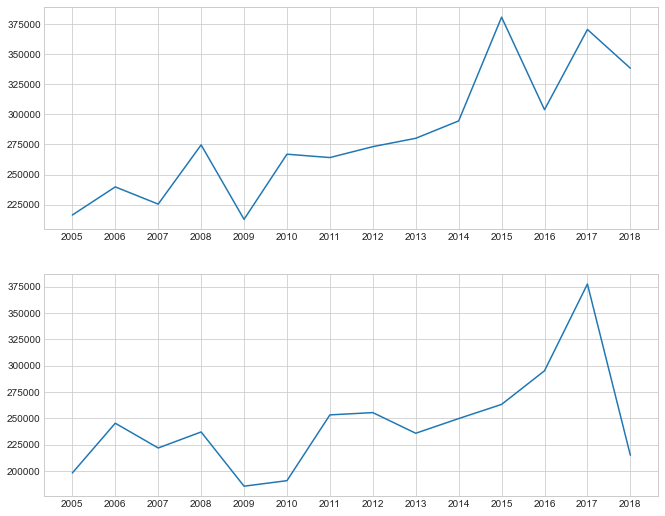

In [165]:
fig, ax = plt.subplots(2, figsize=(11, 9))

ax[0].plot(df_s['prop_yrbld'], df_s['prop_mrktval'])
ax[1].plot(df_s['prop_yrbld'], df_s['prop_saleamt'])

# Comparison of Marketvalue, sales amount trends, Tax Amounts

In [166]:
df_sd = df_resc_type[['SaleYear', 'prop_saleamt', 'prop_mrktval', 'prop_taxamt']]

In [167]:
df_sd_g = df_sd.groupby(by =['SaleYear'], as_index = False).mean()

In [150]:
df_sd.describe()

,prop_saleamt,prop_mrktval,prop_taxamt
count,4.370000e+02,4.370000e+02,4.370000e+02
mean,3.391124e+05,3.161089e+05,6.036108e+05
std,4.566840e+05,3.614179e+05,4.901544e+05
min,0.000000e+00,2.000000e+02,0.000000e+00
25%,1.470000e+05,1.728000e+05,3.021580e+05
50%,2.400000e+05,2.426000e+05,4.768670e+05
75%,3.600000e+05,3.630840e+05,7.394580e+05
max,5.960000e+06,5.687663e+06,3.636749e+06


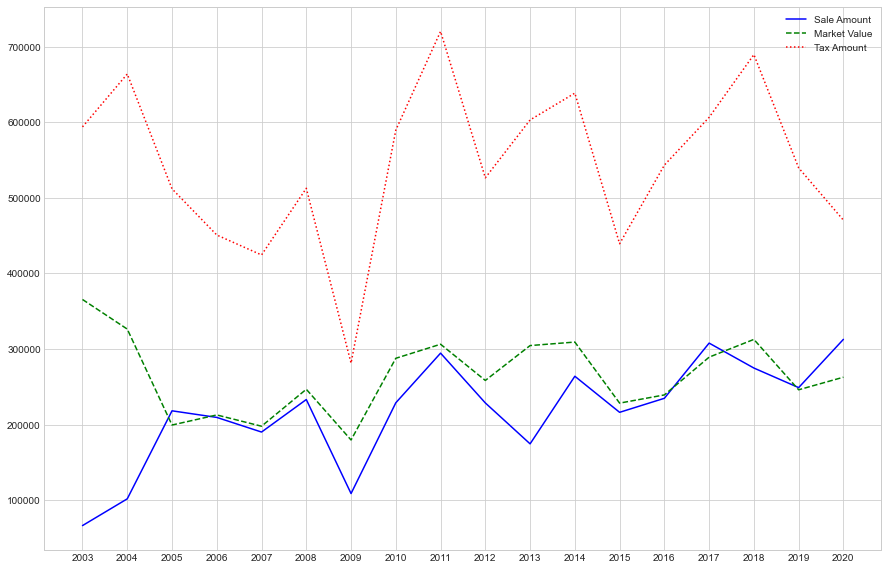

In [244]:
#plt.xlim(min(df_sd_g['prop_saledate']), max(df_sd_g['prop_saledate'])+1000)
fig, ax = plt.subplots(figsize=(15, 10))
#plt.ylim(-1, max(df_sd_g['prop_mrktval'])+1000)
plt.plot(df_sd_g['SaleYear'], df_sd_g['prop_saleamt'], linestyle = 'solid', color = 'blue', label = 'Sale Amount')
plt.plot(df_sd_g['SaleYear'], df_sd_g['prop_mrktval'], linestyle = 'dashed', color = 'green', label = 'Market Value')
plt.plot(df_sd_g['SaleYear'], df_sd_g['prop_taxamt'], linestyle = 'dotted', color = 'red', label = 'Tax Amount')
ax.legend()

# Correlation between variables

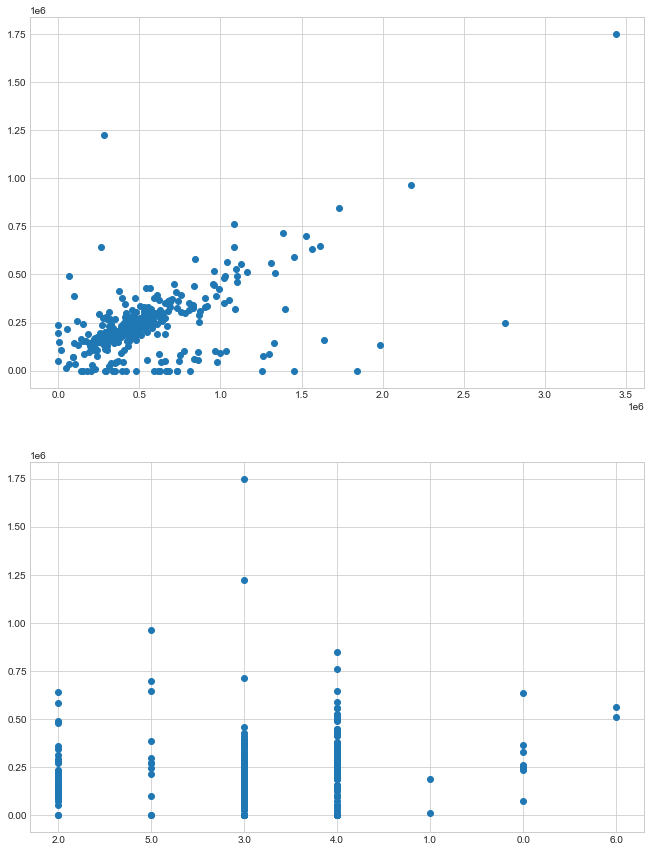

In [169]:
fig, ax = plt.subplots(2, figsize=(11, 15))
plt.style.use('seaborn-whitegrid')
ax[0].plot(df_resc_type['prop_taxamt'], df_resc_type['prop_saleamt'], 'o')
ax[1].plot(df_resc_type['prop_bedrms'], df_resc_type['prop_saleamt'], 'o')

<AxesSubplot:xlabel='prop_yrbld', ylabel='prop_saleamt'>

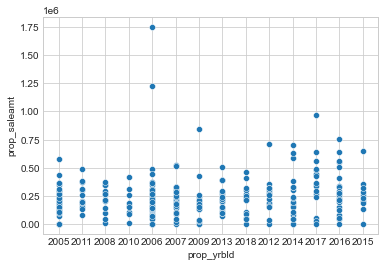

In [197]:
sns.scatterplot(data = df_resc_type, x='prop_yrbld', y ='prop_saleamt')

# Data distribution of tax amount and prop sale amount 

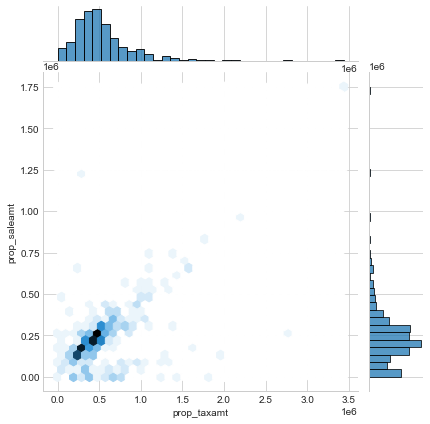

In [170]:
#colors = df_resc_f['prop_style']
#sizes = df_resc_f['prop_bldsqft']
sns.axes_style('white')
x = df_resc_f['prop_taxamt']
y = df_resc_f['prop_saleamt']
sns.jointplot(x = df_resc_type['prop_taxamt'], y = df_resc_type['prop_saleamt'] , data = df_resc_type, kind = 'hex')



In [23]:
df_pp.describe()

,prop_bedrms,prop_saleamt,prop_bldsqft
count,77.000000,6.800000e+01,75.000000
mean,3.376623,2.433792e+05,3698.666667
std,0.761559,1.923938e+05,2696.005811
min,1.000000,1.750000e+04,504.000000
25%,3.000000,1.399500e+05,2298.500000
50%,3.000000,2.229335e+05,3204.000000
75%,4.000000,2.858000e+05,4510.000000
max,6.000000,1.150000e+06,16752.000000


In [12]:
#df_dd1 = df_pp.groupby(by=['prop_bedrms'], as_index = False).sum('prop_saleamt')

In [13]:
#df_dd1.describe()

# Property Sales by Number of Bedrooms

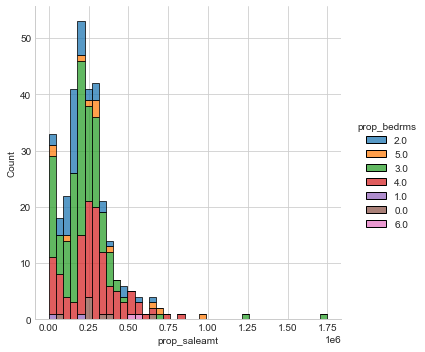

In [171]:
sns.displot(df_resc_type, x='prop_saleamt', hue = 'prop_bedrms', multiple = "stack")

In [173]:
#sns.displot(df_resc_type, x='prop_saleamt', hue = 'state', multiple = "stack")

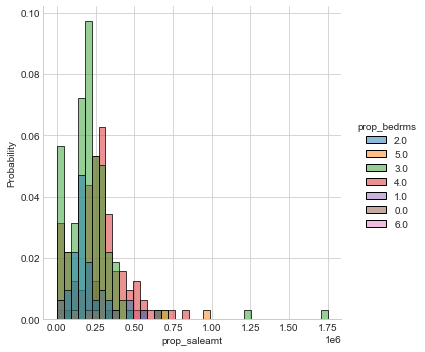

In [174]:
sns.displot(df_resc_type, x="prop_saleamt", hue="prop_bedrms", stat="probability")

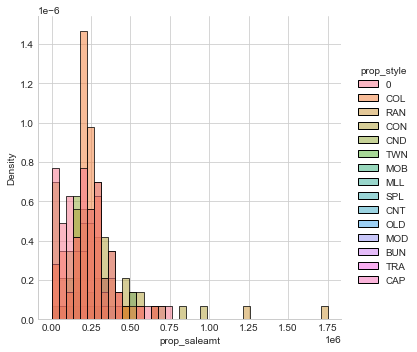

In [178]:

sns.displot(df_resc_type, x= df_resc_type['prop_saleamt'], hue="prop_style", stat="density")

In [179]:
df_heat = df_resc_type[['prop_yrbld', 'prop_style', 'prop_saleamt' ]]

In [180]:
dd = df_heat.groupby(by =['prop_yrbld', 'prop_style' ]).mean()

In [181]:
dd_x = df_heat.drop_duplicates(subset = ['prop_style'])

In [182]:
labels = np.array(dd_x['prop_style'])

In [183]:
dd1 = dd.unstack(level=1)

In [142]:
dd1.head()

prop_saleamt                                         \
prop_style              0      BUN       CAP       CND       CNT   
prop_yrbld                                                         
2005        587127.210526      NaN       NaN  184725.0   72500.0   
2006        573731.625000      NaN       NaN  283850.0  281870.0   
2007        410439.714286      NaN  185700.0  163675.0   51500.0   
2008        501877.133333      NaN       NaN  294000.0  432000.0   
2009        270756.800000  33300.0       NaN  137100.0       0.0   

                                                                        \
prop_style            COL            CON       CTB       MDR       MLL   
prop_yrbld                                                               
2005        284707.857143  227078.333333       NaN   82500.0  108500.0   
2006        287446.153846  124137.500000       NaN  205000.0  494200.0   
2007        660850.769231  232625.000000  170000.0       NaN       NaN   
2008        480215.428571  275050.000000       NaN       NaN  351000.0   
2009        240225.000000  327125.000000       NaN       NaN       NaN   

                                                                           \
prop_style       MOB       MOD      OLD            RAN       RRA SPL  TRA   
prop_yrbld                                                                  
2005        146000.0  368000.0      NaN  181686.230769       NaN NaN  NaN   
2006             NaN       NaN      NaN  566903.916667  226600.0 NaN  0.0   
2007             NaN  330000.0      NaN  205417.200000       NaN NaN  NaN   
2008             NaN       NaN      NaN  279880.000000       NaN NaN  NaN   
2009         36000.0       NaN  32500.0  142686.000000       NaN NaN  NaN   

                      
prop_style       TWN  
prop_yrbld            
2005         83200.0  
2006        193800.0  
2007             NaN  
2008        280450.0  
2009        182536.0

# Distribution of Housing prices across Property Style and Year Built

Text(0.5, 64.5, '')

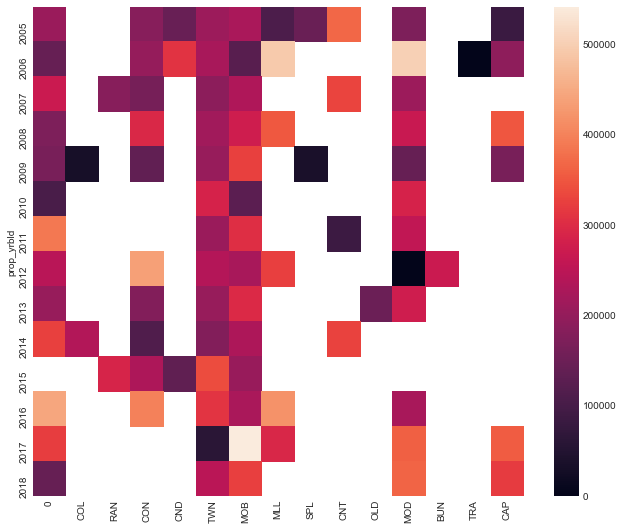

In [184]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dd1)
ax.xaxis.tick_bottom()
xticks_labels = labels
plt.xticks(np.arange(len(labels)) + .5, labels=xticks_labels)
plt.xlabel('')


# Regression Model and Model Evaluation

In [300]:
stats.pearsonr(df_resc_type['prop_bldsqft'], df_resc_type['prop_saleamt'])

stats.pearsonr(df_resc_type['prop_taxamt'], df_resc_type['prop_saleamt'])

stats.pearsonr(df_resc_type['prop_taxamt'], df_resc_type['prop_saleamt'])

(0.5357490296632471, 4.274342399806467e-25)

In [301]:
lm = LinearRegression()

x = np.array(df_resc_type[['prop_taxamt']])
y = np.array(df_resc_type[['prop_saleamt']])

xx = np.reshape(x, (319, -1))
yy = np.reshape(y, (319,-1))

In [302]:
lm.fit(xx,yy)

LinearRegression()

In [303]:
yhat = lm.predict(xx)

mean_squared_error(yy, yhat)

23776485042.323864

In [304]:
lm.coef_

array([[0.24304408]])

In [305]:
lm.intercept_ 

array([103099.51487845])

In [306]:
lm.score(xx,yhat)

1.0